<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/lightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## APIs

Load data...
Start training...
[1]	my_eval's multi_logloss: 1.03545	my_eval's multi_logloss: 1.03545
Training until validation scores don't improve for 5 rounds.
[2]	my_eval's multi_logloss: 0.980161	my_eval's multi_logloss: 0.980161
[3]	my_eval's multi_logloss: 0.928894	my_eval's multi_logloss: 0.928894
[4]	my_eval's multi_logloss: 0.881974	my_eval's multi_logloss: 0.881974
[5]	my_eval's multi_logloss: 0.836849	my_eval's multi_logloss: 0.836849
[6]	my_eval's multi_logloss: 0.798592	my_eval's multi_logloss: 0.798592
[7]	my_eval's multi_logloss: 0.759974	my_eval's multi_logloss: 0.759974
[8]	my_eval's multi_logloss: 0.723955	my_eval's multi_logloss: 0.723955
[9]	my_eval's multi_logloss: 0.692298	my_eval's multi_logloss: 0.692298
[10]	my_eval's multi_logloss: 0.663025	my_eval's multi_logloss: 0.663025
[11]	my_eval's multi_logloss: 0.634518	my_eval's multi_logloss: 0.634518
[12]	my_eval's multi_logloss: 0.609186	my_eval's multi_logloss: 0.609186
[13]	my_eval's multi_logloss: 0.586827	my_e

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 1, 'n_estimators': 20} 0.9833333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


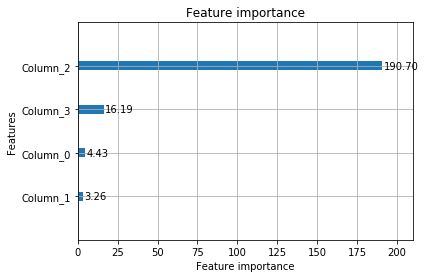

In [0]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

print('Load data...')
iris = load_iris()
data=iris.data
target = iris.target
X_train,X_test,y_train,y_test =train_test_split(data,target,test_size=0.2)


print('Start training...')
gbm = lgb.LGBMClassifier(num_classes=3, objective='multiclass',num_leaves=31,learning_rate=0.05,n_estimators=20)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_names = ['my_eval'], eval_metric='logloss', early_stopping_rounds=5)


print('Start predicting...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)


# feature importances
print('Feature importances:', list(gbm.feature_importances_))


estimator = lgb.LGBMClassifier(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40 , 100]
}
gbm = GridSearchCV(estimator=estimator, param_grid=param_grid)
gbm.fit(X_train, y_train)
print(gbm.best_params_, gbm.best_score_)


new_estimator = lgb.LGBMClassifier()
best_params = {
    'learning_rate': 1,
    'n_estimators': 40
}
new_estimator.set_params(**best_params)
new_estimator.fit(X_train, y_train)
              
from lightgbm import plot_importance
# importance_type:  
# If “split”, result contains numbers of times the feature is used in a model. 
# If “gain”, result contains total gains of splits which use the feature.
lgb.plot_importance(new_estimator, importance_type='gain', precision=2)

In [0]:
import numpy as np
import lightgbm as lgb
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data=iris.data
target = iris.target
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)


from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)

lgb_train = lgb.Dataset('dtrain.svm')
lgb_eval = lgb.Dataset('dtest.svm')
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_classes': 3,
    'num_leaves': 31, 
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5, # bagging every k iterations
    'verbose': 1
}

print('Start training...')
gbm = lgb.train(params,lgb_train,num_boost_round=20,valid_sets=lgb_eval, valid_names=['my_val'],early_stopping_rounds=5)

print('Save model...')
gbm.save_model('model.txt')

bst = lgb.Booster(model_file='model.txt')
print('Start predicting...')
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
np.argmax(y_pred, axis=1)



Start training...
[1]	my_val's multi_logloss: 1.03193
Training until validation scores don't improve for 5 rounds.
[2]	my_val's multi_logloss: 0.970566
[3]	my_val's multi_logloss: 0.914087
[4]	my_val's multi_logloss: 0.86139
[5]	my_val's multi_logloss: 0.813089
[6]	my_val's multi_logloss: 0.768269
[7]	my_val's multi_logloss: 0.726412
[8]	my_val's multi_logloss: 0.687391
[9]	my_val's multi_logloss: 0.651582
[10]	my_val's multi_logloss: 0.618796
[11]	my_val's multi_logloss: 0.585013
[12]	my_val's multi_logloss: 0.553711
[13]	my_val's multi_logloss: 0.524196
[14]	my_val's multi_logloss: 0.499743
[15]	my_val's multi_logloss: 0.473777
[16]	my_val's multi_logloss: 0.449049
[17]	my_val's multi_logloss: 0.426156
[18]	my_val's multi_logloss: 0.40443
[19]	my_val's multi_logloss: 0.384796
[20]	my_val's multi_logloss: 0.366322
Did not meet early stopping. Best iteration is:
[20]	my_val's multi_logloss: 0.366322
Save model...
Start predicting...


array([1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 0])

In [0]:
params = {
    'boosting_type': 'dart',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_data_in_leaf': 2,
    'min_child_weight': 0.2,
    'min_gain_to_split': 0.05,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'feature_fraction': 0.8,
    'lambda_l1': 0.01,
    'lambda_l2': 0.01,
    'objective': 'multiclass',
    'num_class': 3,
    'seed': 27,
    'metric': 'multi_error'
}

cvresult = lgb.cv(params, lgb_train, 
                  num_boost_round = 10, 
                  nfold=5,
                  early_stopping_rounds=50,
                  stratified=True)
import pandas as pd
df = pd.DataFrame(cvresult)
df.columns
df

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


,multi_error-mean,multi_error-stdv
0,0.082696,0.058000
1,0.083029,0.058693
2,0.091362,0.048361
3,0.074696,0.054983
4,0.083029,0.069525
5,0.083029,0.069525
6,0.091362,0.071530
7,0.082667,0.079068
8,0.082667,0.079068
9,0.074333,0.076315


In [0]:
params['n_estimators'] = df.shape[0]

params['min_split_gain'] = params['min_gain_to_split']
params['reg_alpha'] = params['lambda_l1']
params['reg_lambda'] = params['lambda_l2']
params['subsample'] = params['bagging_fraction']
params['subsample_freq'] = params['bagging_freq']
params['colsample_bytree'] = params['feature_fraction']
params['min_child_samples'] = params['min_data_in_leaf']

del params['min_gain_to_split']
del params['lambda_l1']
del params['lambda_l2']
del params['bagging_fraction']
del params['bagging_freq']
del params['feature_fraction']
del params['min_data_in_leaf']

clf = lgb.LGBMClassifier()
clf.set_params(**params)
print(clf.__dict__)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Accuracy of cross validation(train): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy of cross validation(test): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

{'boosting_type': 'dart', 'objective': 'multiclass', 'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 10, 'subsample_for_bin': 200000, 'min_split_gain': 0.05, 'min_child_weight': 0.2, 'min_child_samples': 2, 'subsample': 0.8, 'subsample_freq': 3, 'colsample_bytree': 0.8, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'random_state': None, 'n_jobs': -1, 'silent': True, 'importance_type': 'split', '_Booster': None, '_evals_result': None, '_best_score': None, '_best_iteration': None, '_other_params': {'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.2, 'objective': 'multiclass', 'num_class': 3, 'seed': 27, 'metric': 'multi_error', 'n_estimators': 10, 'min_split_gain': 0.05, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.8, 'subsample_freq': 3, 'colsample_bytree': 0.8, 'min_child_samples': 2}, '_objective': 'multiclass', 'class_weight': None, '_n_features': None, '_classes': None, '_n_classes': None, 'num_class': 3, 'seed': 27, 'met